# Data Visualization

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Read Data

In [46]:
dataframe = pd.read_csv("lista-insucesso-processed.csv", sep=";", encoding="utf-8")
dataframe

,Código,Nome,Turmas,Discentes,Cancelamentos,Reprovações Média,Reprovações Nota,Reprovações Falta,Reprovações Média e Falta,Reprovações Nota e Falta,Trancamentos,Total Insucesso,Semestre,Departamento
0,ADM0014,ADMINISTRAÇÃO PÚBLICA E GESTÃO SOCIAL,1,1,0,0,0,0,0,0,0,0,2023.2,ADM
1,FGA0038,AERODINÂMICA DE SISTEMAS AEROESPACIAIS,1,1,0,0,0,0,0,0,1,1,2023.2,FGA
2,FUP0545,AGRICULTURA E MEIO AMBIENTE,1,1,0,1,0,0,0,0,0,1,2023.2,FUP
3,FUP0161,AGROECOLOGIA,1,1,0,0,0,1,0,0,0,1,2023.2,FUP
4,MAT0039,ALGEBRA LINEAR,1,1,0,0,0,0,0,0,0,0,2023.2,MAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,FGA0214,TÓPICOS ESPECIAIS EM ENGENHARIA AUTOMOTIVA,1,1,0,0,0,0,0,0,1,1,2025.1,FGA
606,FGA0054,TÓPICOS ESPECIAIS EM GOVERNANÇA DE TECNOLOGIA ...,1,30,0,0,0,0,0,0,1,1,2025.1,FGA
607,FGA0053,TÓPICOS ESPECIAIS EM PROGRAMAÇÃO,1,32,1,0,0,3,0,0,11,15,2025.1,FGA
608,CEM0015,"UNIVERSIDADE, SOCIEDADE E ESTADO",1,1,0,0,0,1,0,0,0,1,2025.1,CEM


## Top Failures

/var/folders/6p/8c3c2tb902z8rwwpxtgl57jw0000gn/T/ipykernel_8292/1609614148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


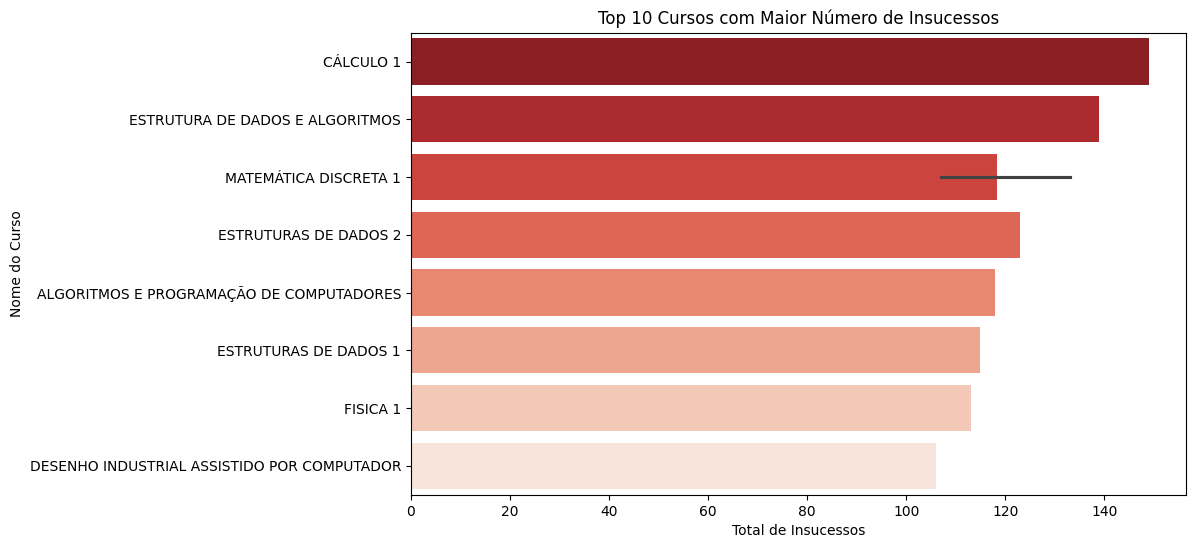

In [47]:
top_failures = dataframe.nlargest(10, "Total Insucesso")[["Nome", "Total Insucesso"]]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_failures,
    x="Total Insucesso",
    y="Nome",
    palette="Reds_r"
)

plt.xlabel("Total de Insucessos")
plt.ylabel("Nome do Curso")
plt.title("Top 10 Cursos com Maior Número de Insucessos")
plt.show()

## Failures per Semester

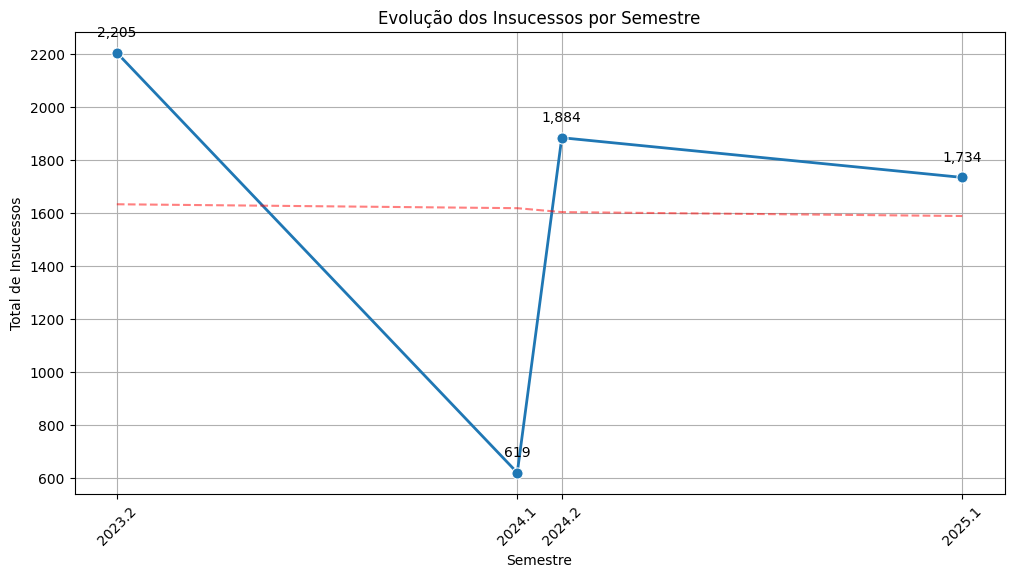

In [ ]:
semesterly_failures = dataframe.groupby("Semestre")["Total Insucesso"].sum().reset_index()

plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=semesterly_failures,
    x="Semestre",
    y="Total Insucesso",
    marker="o",
    linewidth=2,
    markersize=8,
)

plt.xticks(semesterly_failures["Semestre"], rotation=45)

for x, y in zip(semesterly_failures["Semestre"], semesterly_failures["Total Insucesso"]):
    plt.text(x, y+ 50, f'{y:,.0f}', ha='center', va='bottom')

z = np.polyfit(range(len(semesterly_failures)), semesterly_failures['Total Insucesso'], 1)
p = np.poly1d(z)
plt.plot(semesterly_failures['Semestre'], p(range(len(semesterly_failures))), 
         linestyle='--', color='red', alpha=0.5, label='Tendência')


plt.xlabel("Semestre")
plt.ylabel("Total de Insucessos")
plt.title("Evolução dos Insucessos por Semestre")
plt.grid(True)
plt.show()

In [49]:
# Reprovações Nota;Reprovações Falta;Reprovações Média e Falta;Reprovações Nota e Falta

total_reprovações = dataframe[["Reprovações Nota", "Reprovações Falta", "Reprovações Média e Falta", "Reprovações Nota e Falta"]].sum()
total_reprovações

Reprovações Nota               0
Reprovações Falta            886
Reprovações Média e Falta      0
Reprovações Nota e Falta       0
dtype: int64